# The Pandemic Years in 10 Graphs

## Professor Timothy H. Savage, Ph.D. CRE
### NYU Schack Institute of Real Estate
### March 09, 2022

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


In [2]:
vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv')
vaccination = vaccination[vaccination['location'] == 'United States']
vaccination.dropna()
vaccination = vaccination[40:]
vaccination['date'].astype(str)
vaccination['date'] = pd.to_datetime(vaccination['date'], format='%Y-%m-%d')
vaccination = vaccination.set_index('date')
vaccination['people_outstanding'] = (210000000 - vaccination['people_fully_vaccinated'])
vaccination['outstanding'] = (210000000 - vaccination['people_fully_vaccinated']) / 210000000 * 100
vaccination['rate'] = vaccination['daily_vaccinations'] / vaccination['people_outstanding'] * 100
vaccination['booster_count'] = vaccination['total_boosters'] - vaccination['total_boosters'].shift(periods=1, freq="D")

Text(0, 0.5, 'Basis Points')

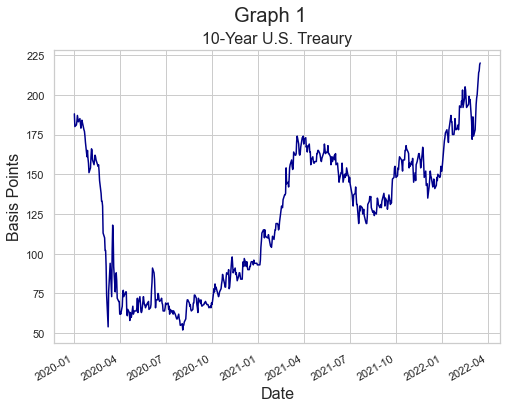

In [3]:
ten_year = fred.get_series("DGS10", observation_start='2020-01-01').dropna() * 100
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 1', fontsize=20)
plt.title('10-Year U.S. Treaury', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Basis Points', fontsize=16)


Text(0, 0.5, 'Basis Points')

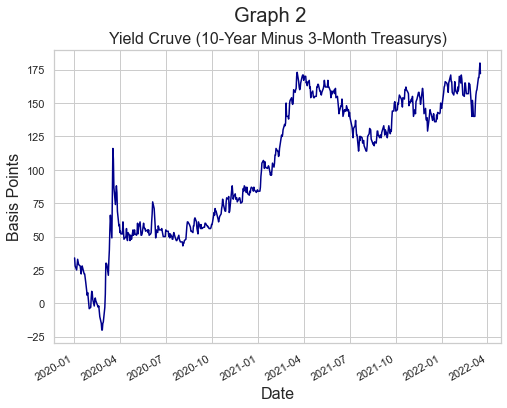

In [4]:
yield_curve = fred.get_series("T10Y3M", observation_start='2020-01-01').dropna() * 100
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 2', fontsize=20)
plt.title('Yield Cruve (10-Year Minus 3-Month Treasurys)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Basis Points', fontsize=16)


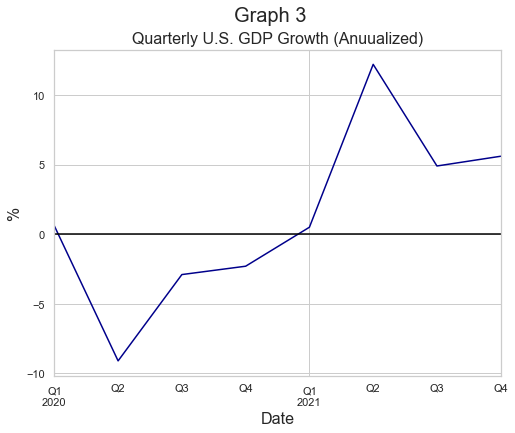

In [5]:
growth = fred.get_series("A191RO1Q156NBEA", observation_start='2020-01-01').dropna()
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 3', fontsize=20)
plt.title('Quarterly U.S. GDP Growth (Anuualized)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, 'Trillions')

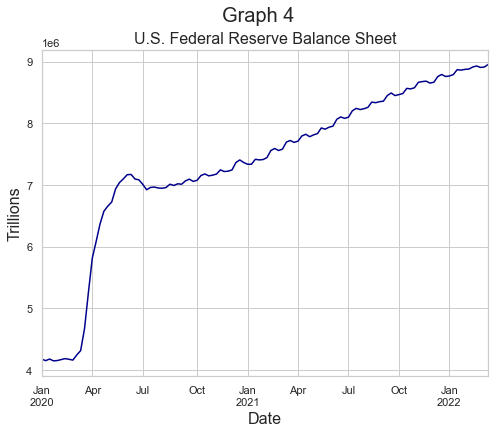

In [6]:
balance_sheet = fred.get_series("WALCL", observation_start='2020-01-01').dropna()
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 4', fontsize=20)
plt.title('U.S. Federal Reserve Balance Sheet', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions', fontsize=16)


Text(0, 0.5, '')

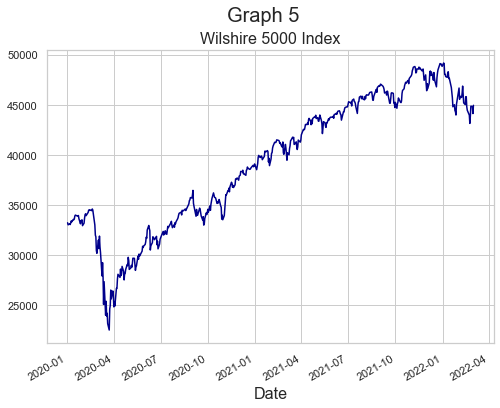

In [7]:
wilshire = fred.get_series("WILL5000PR", observation_start='2020-01-01').dropna()
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 5', fontsize=20)
plt.title('Wilshire 5000 Index', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)


Text(0, 0.5, 'Basis Points')

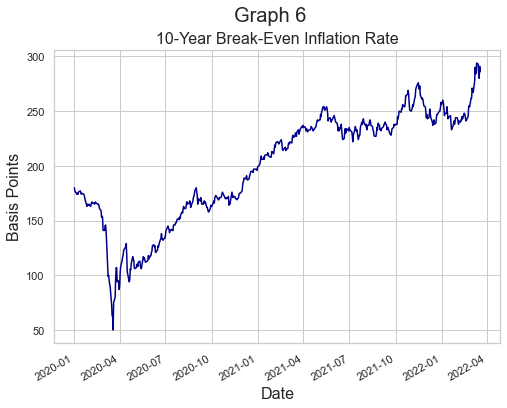

In [8]:
break_even = fred.get_series("T10YIE", observation_start='2020-01-01').dropna() * 100
break_even.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 6', fontsize=20)
plt.title('10-Year Break-Even Inflation Rate', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Basis Points', fontsize=16)


Text(0, 0.5, 'Millions')

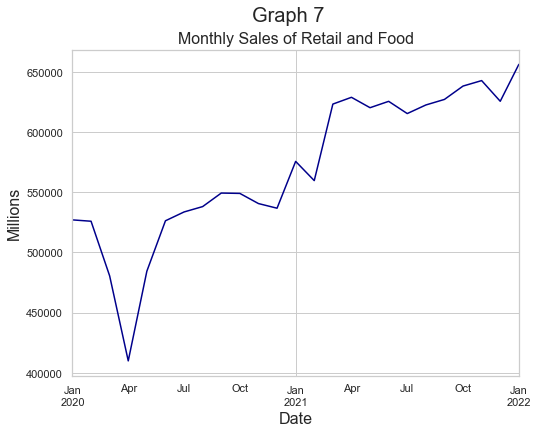

In [9]:
sales = fred.get_series("MRTSSM44X72USS", observation_start='2020-01-01').dropna()
sales.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 7', fontsize=20)
plt.title('Monthly Sales of Retail and Food', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions', fontsize=16)


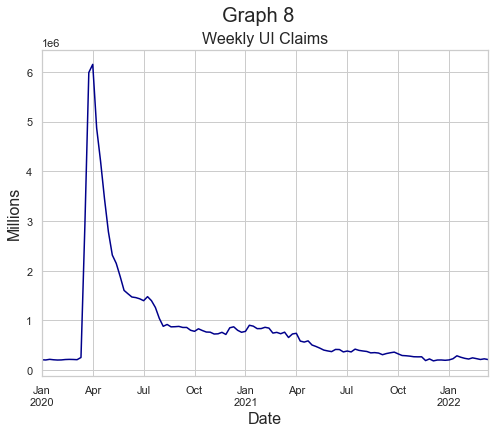

In [10]:
claims = fred.get_series("ICSA", observation_start='2020-01-01').dropna()
claims.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 8', fontsize=20)
plt.title('Weekly UI Claims', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

Text(0, 0.5, 'Millions')

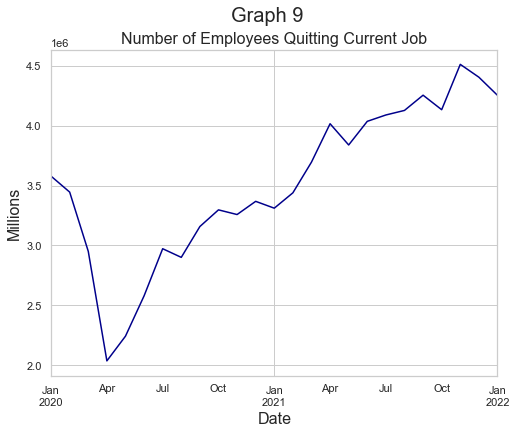

In [11]:
unemp_rate = fred.get_series("JTSQUL", observation_start='2020-01-01').dropna() * 1000
unemp_rate.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 9', fontsize=20)
plt.title('Number of Employees Quitting Current Job', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions', fontsize=16)


Text(0, 0.5, 'Tens of Millions')

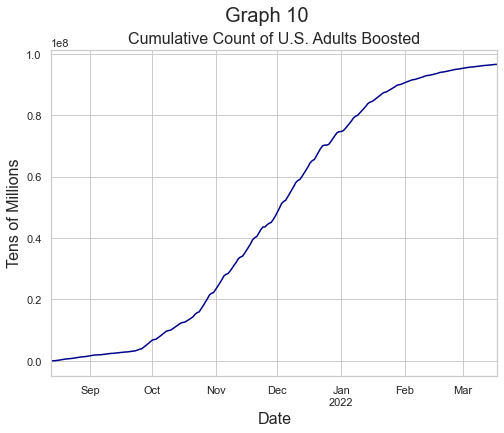

In [12]:
vaccination = vaccination[(vaccination['total_boosters'] > 0)]
vaccination['total_boosters'].plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Graph 10', fontsize=20)
plt.title('Cumulative Count of U.S. Adults Boosted', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Tens of Millions', fontsize=16)
